#### Load Required Libraries 

In [3]:
import pandas as pd
import numpy as np 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.cluster import DBSCAN
from scipy.signal import savgol_filter
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings("ignore")


#### Load Data

In [4]:
census_data = pd.read_csv('./inputs/census_starter.csv')
census_data.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [5]:
mbd_data = pd.read_csv('./inputs/train.csv')
cfips = mbd_data.cfips.unique()
mbd_data.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [6]:
mbd_data

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


In [7]:
revealed_test = pd.read_csv('./inputs/revealed_test.csv')
revealed_test.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,3.442677,1463
1,1001_2022-12-01,1001,Autauga County,Alabama,2022-12-01,3.470915,1475
2,1003_2022-11-01,1003,Baldwin County,Alabama,2022-11-01,8.257636,14145
3,1003_2022-12-01,1003,Baldwin County,Alabama,2022-12-01,8.250630,14133
4,1005_2022-11-01,1005,Barbour County,Alabama,2022-11-01,1.247223,247


In [8]:
# mbd_data.append(revealed_test).shape, revealed_test.shape[1] ,mbd_data.shape[1], revealed_test.shape[0] + mbd_data.shape[0]

In [9]:
mbd_data = mbd_data.append(revealed_test)

In [10]:
mbd_data["year"] = mbd_data.first_day_of_month.apply(lambda x : x.split("-")[0])

In [11]:
mbd_data.year.unique()

array(['2019', '2020', '2021', '2022'], dtype=object)

In [10]:
# column = "pct_bb"
for column in [ "pct_bb", "median_hh_inc", "pct_college", "pct_foreign_born", "pct_it_workers"]:
    print("current column :", column)
    df = census_data[["cfips",column + "_2017", column + "_2018", column + "_2019", column + "_2020", column + "_2021"]]
    df = df.set_index(df.cfips)
    
    df2 = pd.DataFrame(columns = ["cfips", "year", column ])
    for cfip in tqdm(cfips): 
        for year in ["2017","2018","2019","2020","2021"] : 
            df2.loc[len(df2.index)] = [cfip, str(int(year)+2), df.loc[cfip, column +"_"+ year]]
#     df2.head()
    mbd_data = mbd_data.merge(df2, left_on=["cfips","year"], right_on=["cfips","year"], how="left")

current column : pct_bb


100%|██████████| 3135/3135 [00:23<00:00, 133.53it/s]


current column : median_hh_inc


100%|██████████| 3135/3135 [00:15<00:00, 197.74it/s]


current column : pct_college


100%|██████████| 3135/3135 [00:13<00:00, 228.49it/s]


current column : pct_foreign_born


100%|██████████| 3135/3135 [00:16<00:00, 191.72it/s]


current column : pct_it_workers


100%|██████████| 3135/3135 [00:14<00:00, 215.51it/s]


In [11]:
mbd_data.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,pct_bb,median_hh_inc,pct_college,pct_foreign_born,pct_it_workers
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,76.6,55317.0,14.5,2.1,1.3
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019,76.6,55317.0,14.5,2.1,1.3
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2019,76.6,55317.0,14.5,2.1,1.3
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,2019,76.6,55317.0,14.5,2.1,1.3
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,2019,76.6,55317.0,14.5,2.1,1.3


In [12]:
X= mbd_data[[ "cfips", "first_day_of_month", "pct_bb", "median_hh_inc", "pct_college", "pct_foreign_born", "pct_it_workers"]]
X = X.sort_values(by=["cfips","first_day_of_month"]).reset_index(drop=True)
X.median_hh_inc.ffill(inplace=True)
X.pct_it_workers.ffill(inplace=True)
X.head()

,cfips,first_day_of_month,pct_bb,median_hh_inc,pct_college,pct_foreign_born,pct_it_workers
0,1001,2019-08-01,76.6,55317.0,14.5,2.1,1.3
1,1001,2019-09-01,76.6,55317.0,14.5,2.1,1.3
2,1001,2019-10-01,76.6,55317.0,14.5,2.1,1.3
3,1001,2019-11-01,76.6,55317.0,14.5,2.1,1.3
4,1001,2019-12-01,76.6,55317.0,14.5,2.1,1.3


In [13]:
y = mbd_data[["cfips","first_day_of_month","microbusiness_density"]]
y = y.sort_values(by=["cfips","first_day_of_month"]).reset_index(drop=True)
y.head()

,cfips,first_day_of_month,microbusiness_density
0,1001,2019-08-01,3.007682
1,1001,2019-09-01,2.884870
2,1001,2019-10-01,3.055843
3,1001,2019-11-01,2.993233
4,1001,2019-12-01,2.993233


<AxesSubplot: >

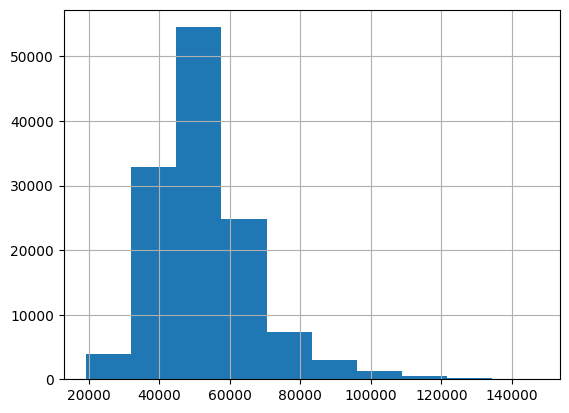

In [14]:
X.median_hh_inc.hist()

In [15]:
sc = MinMaxScaler()
X.median_hh_inc = sc.fit_transform( X.median_hh_inc.values.reshape(-1,1) ).reshape(-1)


<AxesSubplot: >

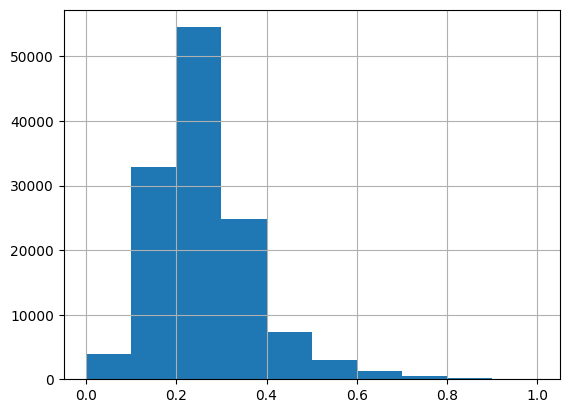

In [16]:
X.median_hh_inc.hist()

#### Clustering

In [17]:
data = []

for cfip in tqdm(cfips): 
    county_mbd = y[ y.cfips == cfip ].microbusiness_density.values[:-2] 
    data.append(county_mbd)

data = np.array(data)

100%|██████████| 3135/3135 [00:00<00:00, 3620.51it/s]


In [18]:
from sklearn.cluster import DBSCAN
data2 = savgol_filter(data, window_length=5, polyorder=1)
dbscan = DBSCAN(eps=1, min_samples=3)
labels = dbscan.fit_predict(data2)

clusters = {}

for index,label in enumerate(labels): 
    if label in clusters: 
        clusters[label].append(cfips[index])
    else: 
        clusters[label] = [ cfips[index] ]


In [19]:
clusters.keys()

dict_keys([0, 4, -1, 1, 2, 3, 5, 6])

#### Modelling

In [20]:
cfip = clusters[0][3]
columns = ["pct_bb","median_hh_inc","pct_college", "pct_foreign_born","pct_it_workers"]
X_cur = X[X.cfips == cfip].loc[:,columns]
time_steps = list( range(len(X_cur)))
X_cur.insert(0, "time_step", time_steps) 

In [21]:
y_cur = y[ y.cfips == cfip ].loc[:,"microbusiness_density"]
model = LinearRegression()
model.fit(X_cur,y_cur)
y_pred = np.maximum(0,model.predict(X_cur))
y_pred

array([1.54205572, 1.55058432, 1.55911292, 1.56764152, 1.57617012,
       1.5470594 , 1.555588  , 1.5641166 , 1.5726452 , 1.58117379,
       1.58970239, 1.59823099, 1.60675959, 1.61528819, 1.62381678,
       1.63234538, 1.64087398, 1.66239311, 1.67092171, 1.67945031,
       1.6879789 , 1.6965075 , 1.7050361 , 1.7135647 , 1.7220933 ,
       1.7306219 , 1.73915049, 1.74767909, 1.75620769, 1.75765001,
       1.76617861, 1.77470721, 1.7832358 , 1.7917644 , 1.800293  ,
       1.8088216 , 1.8173502 , 1.8258788 , 1.83440739, 1.84293599,
       1.85146459])

In [22]:
y_cur.values

array([1.5441476, 1.5758922, 1.5464151, 1.5736247, 1.555485 , 1.5732168,
       1.5369989, 1.5415261, 1.5777441, 1.5754805, 1.5709532, 1.602644 ,
       1.6049075, 1.6479163, 1.6411254, 1.6411254, 1.6139621, 1.6120293,
       1.6887926, 1.7000812, 1.7023391, 1.7204009, 1.7136277, 1.7158855,
       1.71137  , 1.729432 , 1.7316897, 1.7339474, 1.7520094, 1.7529234,
       1.7777077, 1.7979857, 1.764189 , 1.7484171, 1.7732015, 1.8317825,
       1.8362887, 1.8520604, 1.8317825, 1.8362887, 1.8520604])

In [23]:
model.coef_, model.intercept_

(array([ 0.0085286 , -0.00302195, -0.00068692,  0.04755352,  0.0047228 ,
        -0.00468765]),
 1.3121769789143611)

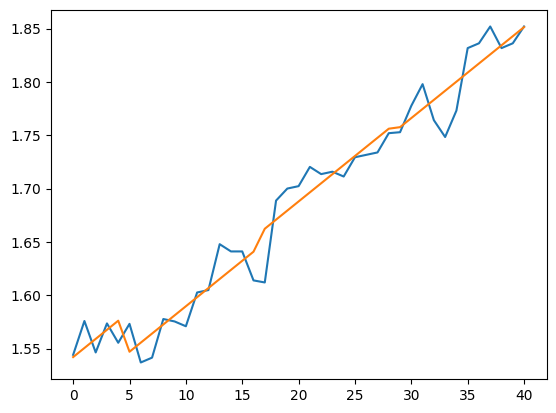

In [24]:
plt.plot(y_cur.values)
plt.plot(y_pred)

In [25]:
X_cur

,time_step,pct_bb,median_hh_inc,pct_college,pct_foreign_born,pct_it_workers
164,0,65.8,0.220169,8.7,4.5,1.3
165,1,65.8,0.220169,8.7,4.5,1.3
166,2,65.8,0.220169,8.7,4.5,1.3
167,3,65.8,0.220169,8.7,4.5,1.3
168,4,65.8,0.220169,8.7,4.5,1.3
169,5,68.5,0.230205,8.1,4.4,1.4
170,6,68.5,0.230205,8.1,4.4,1.4
171,7,68.5,0.230205,8.1,4.4,1.4
172,8,68.5,0.230205,8.1,4.4,1.4
173,9,68.5,0.230205,8.1,4.4,1.4


In [26]:
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_pred) + np.abs(y_true)) / 2
    smape_val = np.mean(numerator / denominator)
    return smape_val

In [27]:
smape(y_cur,np.maximum(0,y_pred))

0.009277178090785172

In [28]:
clusters.keys()

dict_keys([0, 4, -1, 1, 2, 3, 5, 6])

In [29]:
# if key  = -1 then  Unclustered, otherwise clustered 

df = pd.DataFrame(columns = ["Cluster", "Size", "Train SMAPE", "Validation SMAPE", "Train RMSE", "Validation RMSE"])
for index in [0,1,2,3,4,5,6,-1]:
    print(f"Cluster {index}")
    
    train_rmse_arr = []
    test_rmse_arr = []
    train_smape_arr = []
    test_smape_arr = []
    for cfip in tqdm(clusters[index]): 
        columns = ["pct_bb","median_hh_inc","pct_college", "pct_foreign_born","pct_it_workers"]
        X_cur = X[X.cfips == cfip].loc[:,columns]
        time_steps = list( range(len(X_cur)))
        X_cur.insert(0, "time_step", time_steps) 

        y_cur = y[ y.cfips == cfip ].loc[:,"microbusiness_density"]
        
        X_train, X_test, y_train, y_test = train_test_split(X_cur, y_cur, test_size=0.1, shuffle=False)
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        train_smape = smape(y_train_pred, y_train)
        train_smape_arr.append(train_smape)

        y_test_pred = model.predict(X_test)
        test_smape = smape(y_test_pred, y_test)
        test_smape_arr.append(test_smape)

        y_train_pred = model.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
        train_rmse_arr.append(train_rmse)

        y_test_pred = model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test_pred, y_test))
        test_rmse_arr.append(test_rmse)
    
    df.loc[len(df.index)] = [index, len(clusters[index]), round(np.mean(train_smape_arr),3), round(np.mean(test_smape_arr),3), round(np.mean(train_rmse_arr),3), round(np.mean(test_rmse_arr),3) ]



Cluster 0


100%|██████████| 2527/2527 [00:20<00:00, 120.47it/s]


Cluster 1


100%|██████████| 13/13 [00:00<00:00, 134.37it/s]


Cluster 2


100%|██████████| 3/3 [00:00<00:00, 114.98it/s]


Cluster 3


100%|██████████| 4/4 [00:00<00:00, 97.23it/s]


Cluster 4


100%|██████████| 26/26 [00:00<00:00, 121.18it/s]


Cluster 5


100%|██████████| 4/4 [00:00<00:00, 121.21it/s]


Cluster 6


100%|██████████| 3/3 [00:00<00:00, 110.61it/s]


Cluster -1


100%|██████████| 555/555 [00:04<00:00, 131.65it/s]


In [30]:
df.Cluster = df.Cluster.astype('int')
df.Size = df.Size.astype('int')

In [31]:
df

,Cluster,Size,Train SMAPE,Validation SMAPE,Train RMSE,Validation RMSE
0,0,2527,0.021,0.038,0.058,0.092
1,1,13,0.007,0.015,0.087,0.144
2,2,3,0.008,0.012,0.106,0.116
3,3,4,0.007,0.017,0.111,0.186
4,4,26,0.008,0.013,0.081,0.120
5,5,4,0.017,0.037,0.115,0.181
6,6,3,0.032,0.034,0.222,0.171
7,-1,555,0.047,0.098,0.603,1.023


In [32]:
train_rmse_arr = []
test_rmse_arr = []
train_smape_arr = []
test_smape_arr = []
for cfip in tqdm(clusters[-1]): 
    columns = ["pct_bb","median_hh_inc","pct_college", "pct_foreign_born","pct_it_workers"]
    X_cur = X[X.cfips == cfip].loc[:,columns]
    time_steps = list( range(len(X_cur)))
    X_cur.insert(0, "time_step", time_steps) 

    y_cur = y[ y.cfips == cfip ].loc[:,"microbusiness_density"]

    X_train, X_test, y_train, y_test = train_test_split(X_cur, y_cur, test_size=0.1, shuffle=False)
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_smape = smape(y_train_pred, y_train)
    train_smape_arr.append(train_smape)

    y_test_pred = model.predict(X_test)
    test_smape = smape(y_test_pred, y_test)
    test_smape_arr.append(test_smape)

    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
    train_rmse_arr.append(train_rmse)

    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test_pred, y_test))
    test_rmse_arr.append(test_rmse)


100%|██████████| 555/555 [00:04<00:00, 114.09it/s]


In [33]:
train_rmse_arr = np.array(train_rmse_arr)
test_rmse_arr = np.array(test_rmse_arr)
train_smape_arr = np.array(train_smape_arr)
test_smape_arr = np.array(test_smape_arr)

In [101]:
sum(test_smape_arr < 0.02), len(train_smape_arr)

(185, 555)

(array([549.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([2.95831479e-02, 5.07363187e+00, 1.01176806e+01, 1.51617293e+01,
        2.02057780e+01, 2.52498268e+01, 3.02938755e+01, 3.53379242e+01,
        4.03819729e+01, 4.54260216e+01, 5.04700704e+01]),
 <BarContainer object of 10 artists>)

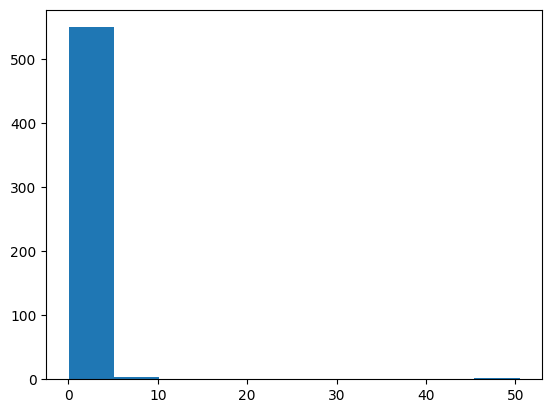

In [74]:
plt.hist(train_rmse_arr)

In [35]:
worst_performing_cfips = np.array(clusters[-1])[(train_smape_arr > 0.047) & (train_smape_arr < 0.2)]

In [36]:
worst_performing_cfips1 = np.array(clusters[-1])[train_rmse_arr > 1 ]
worst_performing_cfips1

array([ 2060,  5055,  5141,  8031,  8069,  8105, 10003, 10005, 12001,
       12037, 12045, 12065, 12131, 16021, 17037, 17075, 19177, 21211,
       21215, 24013, 29171, 30045, 30067, 31163, 32017, 32510, 37175,
       38039, 38101, 40085, 46073, 46099, 46107, 46127, 48155, 48179,
       51043, 51121, 51830, 55067, 56009, 56019, 56033], dtype=int64)

In [37]:
worst_performing_cfips2 = np.array(clusters[-1])[test_rmse_arr > 1]
worst_performing_cfips2

np.union1d(worst_performing_cfips1,worst_performing_cfips2).shape

(80,)

In [38]:
intersection = np.intersect1d(worst_performing_cfips1,worst_performing_cfips2)
len(intersection), len(worst_performing_cfips1), len(worst_performing_cfips2)

(28, 43, 65)

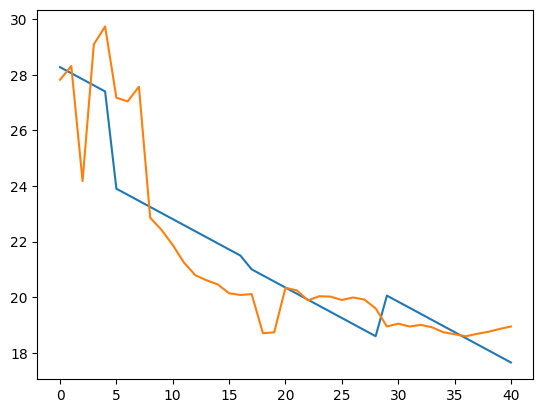

In [39]:
cfip = 56019
columns = ["pct_bb","median_hh_inc","pct_college", "pct_foreign_born","pct_it_workers"]
X_cur = X[X.cfips == cfip].loc[:,columns]
time_steps = list( range(len(X_cur)))
X_cur.insert(0, "time_step", time_steps) 

y_cur = y[ y.cfips == cfip ].loc[:,"microbusiness_density"]
X_train, X_test, y_train, y_test = train_test_split(X_cur, y_cur, test_size=0.1, shuffle=False)

model = LinearRegression()
model.fit(X_cur, y_cur)

predictions = model.predict(X_cur)
plt.plot(predictions)
plt.plot(y_cur.values)
plt.show()

In [40]:
predictions

array([28.27734375, 28.05859375, 27.83984375, 27.62109375, 27.40234375,
       23.90234375, 23.68359375, 23.46484375, 23.24609375, 23.02734375,
       22.80859375, 22.58984375, 22.37109375, 22.15234375, 21.93359375,
       21.71484375, 21.49609375, 21.        , 20.78125   , 20.5625    ,
       20.34375   , 20.125     , 19.90625   , 19.6875    , 19.46875   ,
       19.25      , 19.03125   , 18.8125    , 18.59375   , 20.0546875 ,
       19.8359375 , 19.6171875 , 19.3984375 , 19.1796875 , 18.9609375 ,
       18.7421875 , 18.5234375 , 18.3046875 , 18.0859375 , 17.8671875 ,
       17.6484375 ])

In [41]:
y_test.values

array([18.591715, 18.679548, 18.752745, 18.855219, 18.943054])

In [42]:
smape(predictions,y_cur.values)

0.050757699237844955

In [43]:
mbd_data[mbd_data.cfips == cfip]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,pct_bb,median_hh_inc,pct_college,pct_foreign_born,pct_it_workers
121719,56019_2019-08-01,56019,Johnson County,Wyoming,2019-08-01,27.821917,1856,2019,69.2,52415.0,18.1,2.4,0.9
121720,56019_2019-09-01,56019,Johnson County,Wyoming,2019-09-01,28.316595,1889,2019,69.2,52415.0,18.1,2.4,0.9
121721,56019_2019-10-01,56019,Johnson County,Wyoming,2019-10-01,24.179283,1613,2019,69.2,52415.0,18.1,2.4,0.9
121722,56019_2019-11-01,56019,Johnson County,Wyoming,2019-11-01,29.096088,1941,2019,69.2,52415.0,18.1,2.4,0.9
121723,56019_2019-12-01,56019,Johnson County,Wyoming,2019-12-01,29.740669,1984,2019,69.2,52415.0,18.1,2.4,0.9
121724,56019_2020-01-01,56019,Johnson County,Wyoming,2020-01-01,27.179333,1799,2020,72.0,55991.0,19.4,1.2,1.2
121725,56019_2020-02-01,56019,Johnson County,Wyoming,2020-02-01,27.043360,1790,2020,72.0,55991.0,19.4,1.2,1.2
121726,56019_2020-03-01,56019,Johnson County,Wyoming,2020-03-01,27.572142,1825,2020,72.0,55991.0,19.4,1.2,1.2
121727,56019_2020-04-01,56019,Johnson County,Wyoming,2020-04-01,22.858438,1513,2020,72.0,55991.0,19.4,1.2,1.2
121728,56019_2020-05-01,56019,Johnson County,Wyoming,2020-05-01,22.420305,1484,2020,72.0,55991.0,19.4,1.2,1.2


In [44]:
# list(errors).index(max(errors)), len(errors)

In [45]:
# plt.hist(errors[errors < 0.5])
# plt.xlabel("smape error")
# plt.ylabel("frequency")
# plt.title("Histogram of error distribution ( Cluster 0 )")
# plt.show()

In [46]:
# sum(errors < 0.02)

In [47]:
# cfip = clusters[-1][list(errors).index( max(errors) )]
# cfip.dtype

In [48]:
# Blacklisted 

# cfip = 28055 , Issaquena County	Mississippi state : Always predict microbusiness density = 0 for future months 
# cfip = 48301 , Loving County	Texas : Seasonality present 


In [49]:
# y_filtered = y[["cfips","microbusiness_density"]].groupby("cfips").min()
# y_filtered[ y_filtered.microbusiness_density == 0 ]

### Leaderboard Submission

In [50]:
# On leaderboard we need to make predictions for next 5 months Jan, Feb, March, April, March, May 

n = len(X.first_day_of_month.unique())

df_test = pd.DataFrame(columns=["cfips","first_day_of_month", "time_step"])

dates = pd.date_range(start='2023-01-01', end='2023-06-01', freq='MS')
for cfip in tqdm(cfips) : 
    for i, date in enumerate(dates) : 
        df_test.loc[len(df_test.index)] = [cfip, date, n+i]
df_test

100%|██████████| 3135/3135 [00:29<00:00, 104.99it/s]


,cfips,first_day_of_month,time_step
0,1001,2023-01-01,41
1,1001,2023-02-01,42
2,1001,2023-03-01,43
3,1001,2023-04-01,44
4,1001,2023-05-01,45
...,...,...,...
18805,56045,2023-02-01,42
18806,56045,2023-03-01,43
18807,56045,2023-04-01,44
18808,56045,2023-05-01,45


In [51]:
df_test["year"] = df_test.first_day_of_month.apply(lambda x : str(x).split("-")[0])
df_test.head()

,cfips,first_day_of_month,time_step,year
0,1001,2023-01-01,41,2023
1,1001,2023-02-01,42,2023
2,1001,2023-03-01,43,2023
3,1001,2023-04-01,44,2023
4,1001,2023-05-01,45,2023


In [52]:
# column = "pct_bb"
for column in [ "pct_bb", "median_hh_inc", "pct_college", "pct_foreign_born", "pct_it_workers"]:
    print("current column :", column)
    df = census_data[["cfips",column + "_2017", column + "_2018", column + "_2019", column + "_2020", column + "_2021"]]
    df = df.set_index(df.cfips)
    
    df2 = pd.DataFrame(columns = ["cfips", "year", column ])
    for cfip in tqdm(cfips): 
        for year in ["2017","2018","2019","2020","2021"] : 
            df2.loc[len(df2.index)] = [cfip, str(int(year)+2), df.loc[cfip, column +"_"+ year]]
#     df2.head()
    df_test = df_test.merge(df2, left_on=["cfips","year"], right_on=["cfips","year"], how="left")

current column : pct_bb


100%|██████████| 3135/3135 [00:18<00:00, 167.88it/s]


current column : median_hh_inc


100%|██████████| 3135/3135 [00:15<00:00, 196.10it/s]


current column : pct_college


100%|██████████| 3135/3135 [00:14<00:00, 214.67it/s]


current column : pct_foreign_born


100%|██████████| 3135/3135 [00:14<00:00, 221.59it/s]


current column : pct_it_workers


100%|██████████| 3135/3135 [00:14<00:00, 209.51it/s]


In [53]:
df_test.head()

,cfips,first_day_of_month,time_step,year,pct_bb,median_hh_inc,pct_college,pct_foreign_born,pct_it_workers
0,1001,2023-01-01,41,2023,85.5,62660.0,16.4,2.1,1.1
1,1001,2023-02-01,42,2023,85.5,62660.0,16.4,2.1,1.1
2,1001,2023-03-01,43,2023,85.5,62660.0,16.4,2.1,1.1
3,1001,2023-04-01,44,2023,85.5,62660.0,16.4,2.1,1.1
4,1001,2023-05-01,45,2023,85.5,62660.0,16.4,2.1,1.1


In [54]:
df_test["median_hh_inc"] = sc.transform(df_test.median_hh_inc.values.reshape(-1,1)).reshape(-1)

In [55]:
X_sub = df_test[["cfips","time_step","pct_bb","median_hh_inc","pct_college","pct_foreign_born","pct_it_workers"]]
df_test_sub = df_test[["cfips","first_day_of_month"]]
df_test_sub["microbusiness_density"] = 0


for cfip in tqdm(cfips): 
    columns = ["pct_bb","median_hh_inc","pct_college", "pct_foreign_born","pct_it_workers"]
    X_train = X[X.cfips == cfip].loc[:,columns]
    time_steps = list( range(len(X_cur)))
    X_train.insert(0, "time_step", time_steps) 
    y_train = y[ y.cfips == cfip ].loc[:,"microbusiness_density"]
    
    
    X_test = X_sub[X_sub.cfips == cfip].iloc[:,1:]
    X_test.median_hh_inc = X_train.append(X_test).median_hh_inc.ffill()[-len(X_test):].values

    model = LinearRegression()
    model.fit(X_train,y_train)

    predictions = model.predict(X_test).reshape(-1)

    df_test_sub.loc[(df_test.cfips == cfip), "microbusiness_density"] = predictions

100%|██████████| 3135/3135 [00:16<00:00, 188.22it/s]


In [56]:
sample_submission = pd.read_csv("./inputs/sample_submission.csv")
df_test_sub["row_id"] = df_test_sub["cfips"].astype(str) + "_" + df_test_sub["first_day_of_month"].astype(str)

In [57]:
df_test_sub = df_test_sub[["row_id","microbusiness_density"]]
sample_submission = sample_submission[["row_id"]].merge(df_test_sub,left_on=['row_id'], right_on=['row_id'])
sample_submission

,row_id,microbusiness_density
0,1001_2023-01-01,3.796415
1,1003_2023-01-01,7.991037
2,1005_2023-01-01,1.310089
3,1007_2023-01-01,1.241737
4,1009_2023-01-01,1.876173
...,...,...
18805,56037_2023-06-01,2.327429
18806,56039_2023-06-01,26.650094
18807,56041_2023-06-01,4.351702
18808,56043_2023-06-01,5.223853


In [58]:
sample_submission.to_csv("./outputs/lr_result.csv")

In [59]:
len(clusters[-1])

555

In [60]:
len([ str(elem) for elem in clusters[-1] if len(str(elem)) == 4 and str(elem).startswith('8')])
len([str(elem) for elem in cfips if len(str(elem)) == 4 and str(elem).startswith('8')] )

64

### Plot a county

In [61]:
intersection

array([ 5055,  8031,  8069,  8105, 10003, 10005, 12001, 12045, 12131,
       17075, 21215, 30045, 30067, 31163, 32017, 32510, 38101, 40085,
       46073, 46099, 46107, 46127, 48155, 48179, 51121, 51830, 56019,
       56033], dtype=int64)

In [62]:
intersection

array([ 5055,  8031,  8069,  8105, 10003, 10005, 12001, 12045, 12131,
       17075, 21215, 30045, 30067, 31163, 32017, 32510, 38101, 40085,
       46073, 46099, 46107, 46127, 48155, 48179, 51121, 51830, 56019,
       56033], dtype=int64)

In [ ]:
for cfip in worst_performing_cfips:
    location = mbd_data[mbd_data.cfips == cfip].county.iloc[0] + ", " +mbd_data[mbd_data.cfips == cfip].state.iloc[0]
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(10, 6))
    dates = pd.date_range(start='2019-08-01', end='2022-12-01', freq='MS')
    values = mbd_data[mbd_data.cfips == cfip]["microbusiness_density"].values

    # Plot the line
    ax.plot(dates, values)

    # Set the axis labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Microbusiness Density')
    ax.set_title(f'{location} ( CFIP {cfip} )  ')

    # Rotate the x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Show the plot
    plt.show()

In [64]:
# mbd_data[mbd_data.cfips == 46127]

In [66]:
smape(y_pred,y_true)

0.030197268212676955

In [77]:
df_test.to_csv("./outputs/df_test.csv",index=False)
mbd_data.to_csv("./outputs/mbd_data.csv",index=False)

In [81]:
import json

In [92]:
clusters2 = {}
for key in clusters: 
    clusters2[int(key)] = list(map(int,clusters[key]))
# clusters2

In [93]:
json.dump(clusters2, open("./outputs/clusters.json", "w"))

In [95]:
clusters3 = json.loads(open("./outputs/clusters.json", "r").read())
clusters3

{'0': [1001,
  1005,
  1007,
  1009,
  1011,
  1015,
  1017,
  1019,
  1021,
  1023,
  1025,
  1027,
  1029,
  1031,
  1033,
  1037,
  1039,
  1041,
  1043,
  1045,
  1047,
  1049,
  1051,
  1053,
  1055,
  1059,
  1061,
  1063,
  1065,
  1067,
  1069,
  1071,
  1073,
  1075,
  1077,
  1079,
  1081,
  1083,
  1085,
  1087,
  1089,
  1091,
  1093,
  1095,
  1097,
  1099,
  1101,
  1103,
  1105,
  1107,
  1109,
  1113,
  1115,
  1119,
  1121,
  1123,
  1127,
  1129,
  1131,
  2013,
  2016,
  2020,
  2050,
  2070,
  2090,
  2105,
  2110,
  2130,
  2150,
  2170,
  2180,
  2185,
  2188,
  2195,
  2240,
  2290,
  4001,
  4003,
  4005,
  4007,
  4009,
  4011,
  4012,
  4015,
  4017,
  4019,
  4021,
  4023,
  4027,
  5001,
  5003,
  5005,
  5007,
  5009,
  5011,
  5013,
  5015,
  5017,
  5019,
  5021,
  5023,
  5025,
  5027,
  5029,
  5033,
  5035,
  5037,
  5039,
  5041,
  5043,
  5045,
  5047,
  5049,
  5051,
  5053,
  5057,
  5059,
  5061,
  5063,
  5065,
  5067,
  5069,
  5071,
  5073,
  5

In [12]:
census_data

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,82.2,82.4,84.0,86.7,88.4,56037,15.3,15.2,14.8,13.7,...,0.6,0.6,1.0,0.9,1.0,71083,73008.0,74843,73384.0,76668.0
3138,83.5,85.9,87.1,89.1,90.5,56039,37.7,37.8,38.9,37.2,...,0.7,1.2,1.4,1.5,2.0,80049,83831.0,84678,87053.0,94498.0
3139,83.8,88.2,89.5,91.4,90.6,56041,11.9,10.5,11.1,12.6,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0
3140,76.4,78.3,78.2,82.8,85.4,56043,15.4,15.0,15.4,15.0,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0
